Shape: (503, 8)
Columns: ['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'CIK', 'Founded']

Numeric columns available for analysis: ['CIK', 'Founded Year']

--- CIK ---
Mean: 821753.648111332
Median: 900075.0
Mode: [1564708 1652044 1754301]
Standard Deviation: 566520.0301387267
Variance: 320944944548.38385

--- Founded Year ---
Mean: 1955.737574552684
Median: 1971.0
Mode: [1998.]
Standard Deviation: 48.74871251422677
Variance: 2376.4369717947297


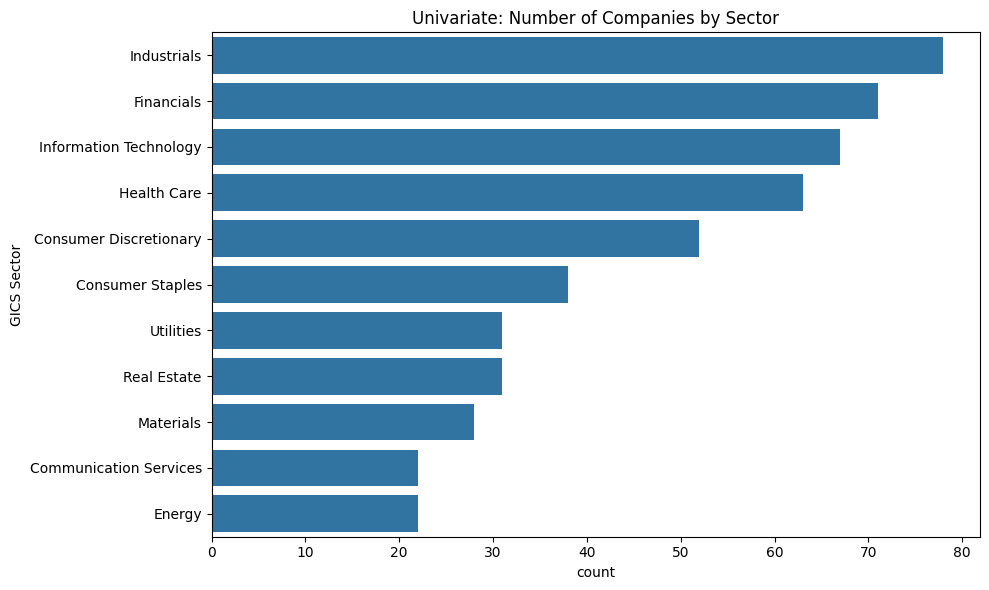

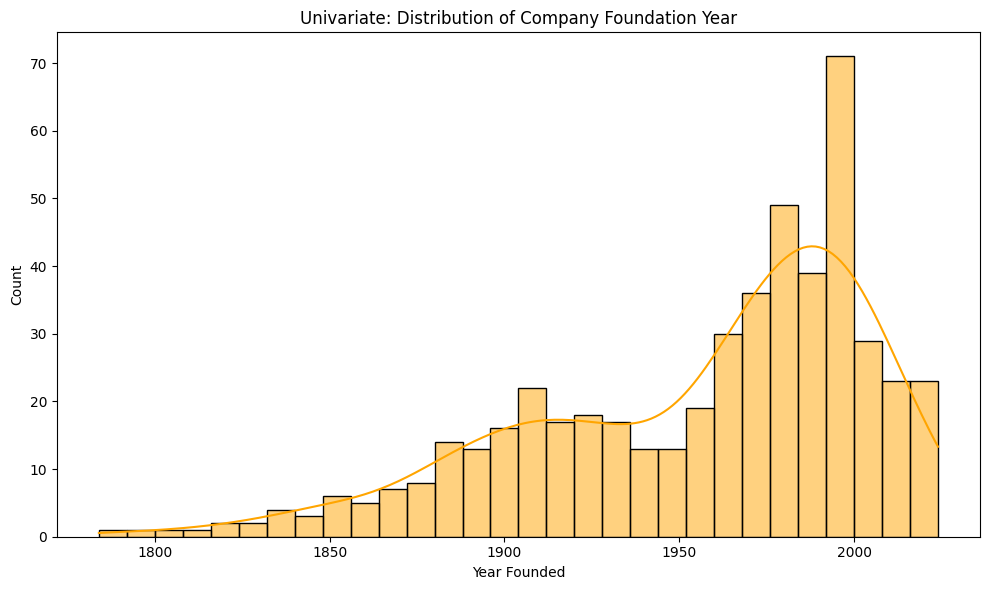

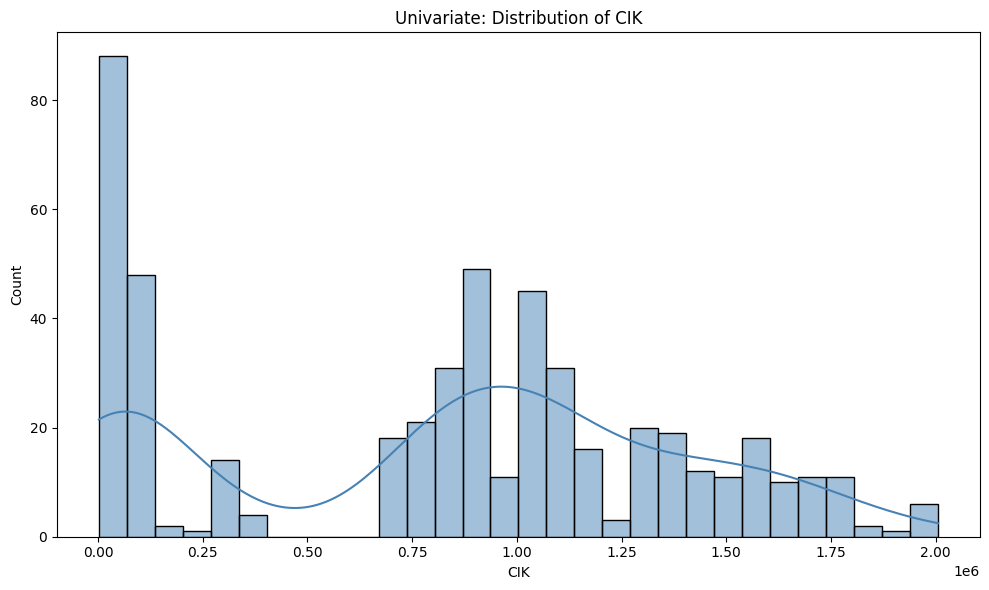

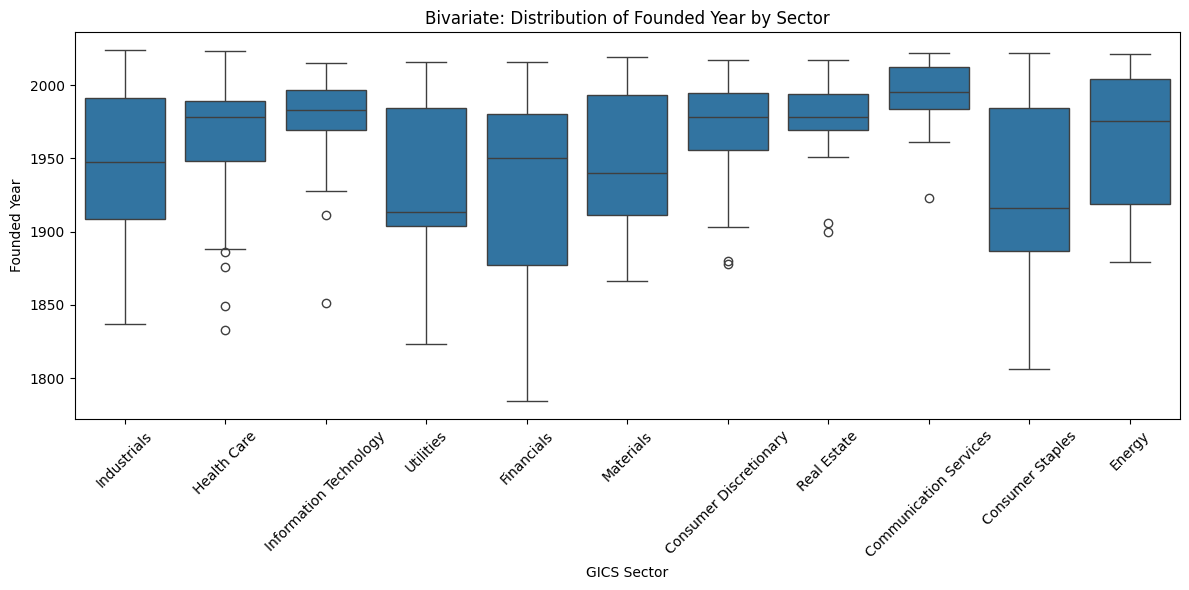

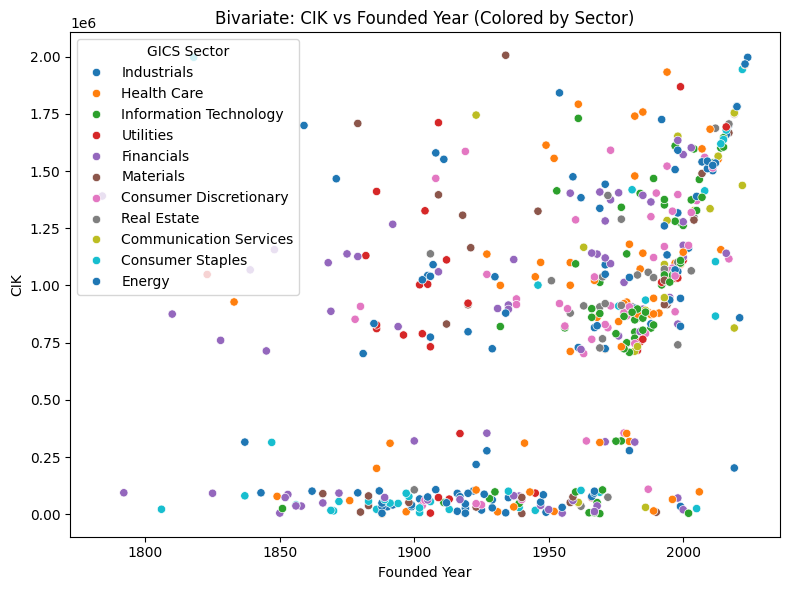


Bivariate: Pearson Correlation between CIK & Founded Year
Correlation Coefficient: 0.47920601341189917
P-value: 3.0579882520405974e-30

Multivariate: Correlation matrix:
                    CIK  Founded Year
CIK           1.000000      0.479206
Founded Year  0.479206      1.000000


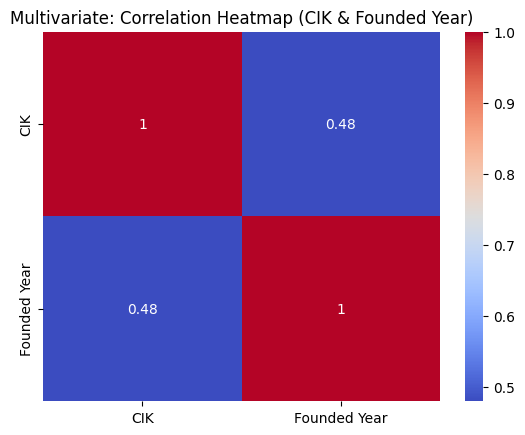

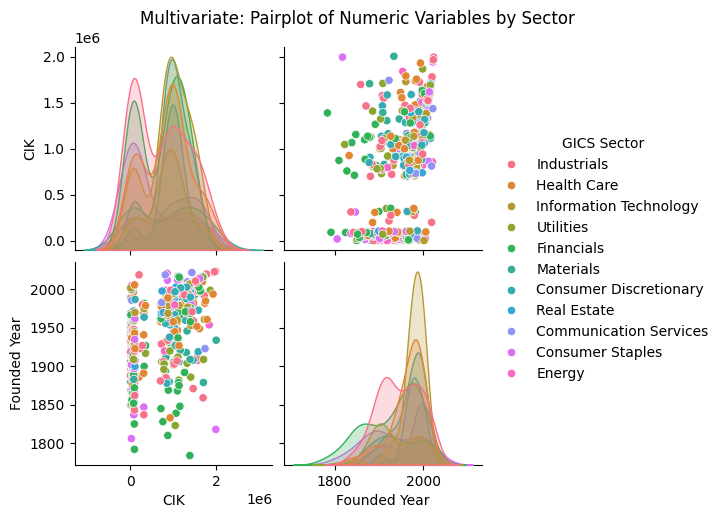

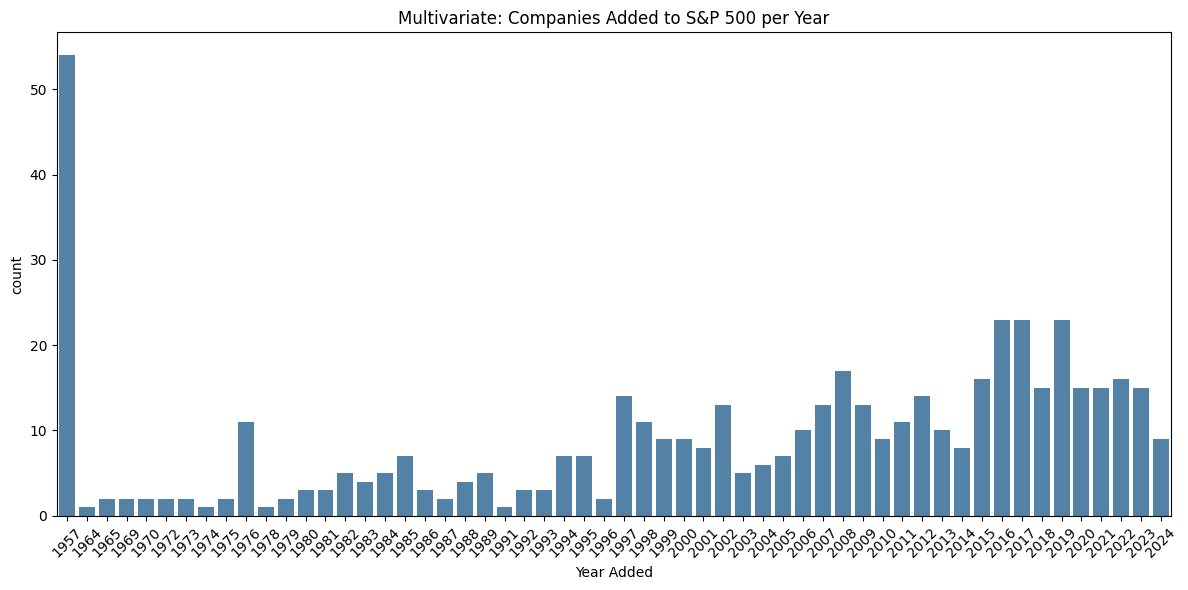

In [ ]:
#module 3
#22BDS0226 PAYAL CHATTERJEE
# EDA on constituents.csv
# Sections: Univariate, Bivariate, Multivariate

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Extract numeric 'Founded Year' and 'Year Added'
df['Founded Year'] = df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)
df['Year Added'] = pd.to_datetime(df['Date added'], errors='coerce').dt.year

numeric_cols = ['CIK', 'Founded Year']
print("\nNumeric columns available for analysis:", numeric_cols)

# -----------------------------
# UNIVARIATE ANALYSIS
# (Single variable)
# -----------------------------

# 1. Central Tendency & Dispersion for numeric columns
for col in numeric_cols:
    if df[col].notna().any():
        print(f"\n--- {col} ---")
        print("Mean:", df[col].mean())
        print("Median:", df[col].median())
        print("Mode:", df[col].mode().values)
        print("Standard Deviation:", df[col].std())
        print("Variance:", df[col].var())

# 2. Countplot of Sectors (Categorical)
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='GICS Sector', order=df['GICS Sector'].value_counts().index)
plt.title("Univariate: Number of Companies by Sector")
plt.tight_layout()
plt.show()

# 3. Histogram of Founded Year
plt.figure(figsize=(10,6))
sns.histplot(df['Founded Year'].dropna(), bins=30, kde=True, color='orange')
plt.title("Univariate: Distribution of Company Foundation Year")
plt.xlabel("Year Founded")
plt.tight_layout()
plt.show()

# 4. Histogram of CIK
plt.figure(figsize=(10,6))
sns.histplot(df['CIK'], bins=30, kde=True, color='steelblue')
plt.title("Univariate: Distribution of CIK")
plt.xlabel("CIK")
plt.tight_layout()
plt.show()

# -----------------------------
# BIVARIATE ANALYSIS
# (Two variables)
# -----------------------------

# 5. Boxplot: Founded Year by Sector
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='GICS Sector', y='Founded Year')
plt.title("Bivariate: Distribution of Founded Year by Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Scatter plot: CIK vs Founded Year
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Founded Year', y='CIK', hue='GICS Sector', palette='tab10')
plt.title("Bivariate: CIK vs Founded Year (Colored by Sector)")
plt.tight_layout()
plt.show()

# 7. Pearson correlation
df_numeric = df[numeric_cols].dropna()
corr_result = stats.pearsonr(df_numeric['CIK'], df_numeric['Founded Year'])
print("\nBivariate: Pearson Correlation between CIK & Founded Year")
print("Correlation Coefficient:", corr_result[0])
print("P-value:", corr_result[1])

# -----------------------------
# MULTIVARIATE ANALYSIS
# (Three or more variables)
# -----------------------------

# 8. Correlation Heatmap
corr = df[numeric_cols].corr()
print("\nMultivariate: Correlation matrix:\n", corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Multivariate: Correlation Heatmap (CIK & Founded Year)")
plt.show()

# 9. Pairplot for numeric variables by sector
sns.pairplot(df[numeric_cols + ['GICS Sector']], hue='GICS Sector')
plt.suptitle("Multivariate: Pairplot of Numeric Variables by Sector", y=1.02)
plt.show()

# 10. Time-series: Companies Added per Year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year Added', color='steelblue')
plt.title("Multivariate: Companies Added to S&P 500 per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
